# DSCI 532 Milestone 3

## Barchart

In [1]:
options(tidyverse.quiet = TRUE,
        repr.plot.width = 8,
        repr.plot.height = 5)

library("tidyverse")
library("cowplot")
library("gapminder")
library("ggridges") 
library("scales")

library(viridis)
library("ggthemes")
theme_set(theme_cowplot())


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘ggridges’

The following object is masked from ‘package:ggplot2’:

    scale_discrete_manual


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Loading required package: viridisLite

Attaching package: ‘viridis’

The following object is masked from ‘package:scales’:

    viridis_pal


Attaching package: ‘ggthemes’

The following object is masked from ‘package:cowplot’:

    theme_map



In [2]:
df <- read_csv("data/birdstrikes_clean.csv")
head(df)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  date = col_date(format = ""),
  year = col_double(),
  month = col_double(),
  day = col_double(),
  time_of_day = col_character(),
  damage_level = col_character(),
  damage_level_sort = col_double(),
  flight_phase = col_character(),
  state = col_character(),
  airport = col_character(),
  operator = col_character(),
  speed = col_double(),
  aircraft_model = col_character(),
  bird_size = col_character(),
  species = col_character()
)


X1,date,year,month,day,time_of_day,damage_level,damage_level_sort,flight_phase,state,airport,operator,speed,aircraft_model,bird_size,species
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
0,1990-01-08,1990,1,8,Day,None,1,Climb,Louisiana,BARKSDALE AIR FORCE BASE ARPT,MILITARY,300,T-38A,Large,Turkey vulture
1,1990-01-09,1990,1,9,Night,None,1,Approach,Louisiana,BARKSDALE AIR FORCE BASE ARPT,MILITARY,200,KC-10A,Medium,Unknown bird or bat
2,1990-01-11,1990,1,11,Day,None,1,Take-off run,Louisiana,BARKSDALE AIR FORCE BASE ARPT,MILITARY,130,B-52,Medium,Unknown bird or bat
3,1990-01-11,1990,1,11,Day,Substantial,4,Take-off run,Louisiana,NEW ORLEANS INTL,SOUTHWEST AIRLINES,140,B-737-300,Small,Rock pigeon
4,1990-01-12,1990,1,12,Day,None,1,Climb,Louisiana,BARKSDALE AIR FORCE BASE ARPT,MILITARY,160,KC-10A,Medium,Unknown bird or bat
5,1990-02-02,1990,2,2,Day,None,1,Take-off run,Louisiana,BARKSDALE AIR FORCE BASE ARPT,MILITARY,180,KC-10A,Medium,Unknown bird or bat


In [3]:
df_grouped <- df%>% group_by(flight_phase, damage_level)%>%
      summarize(count = n())
    
df_grouped

flight_phase,damage_level,count
<chr>,<chr>,<int>
Approach,Medium,72
Approach,Minor,258
Approach,None,4210
Approach,Substantial,70
Climb,Medium,59
Climb,Minor,146
Climb,None,1638
Climb,Substantial,109
Descent,Medium,9


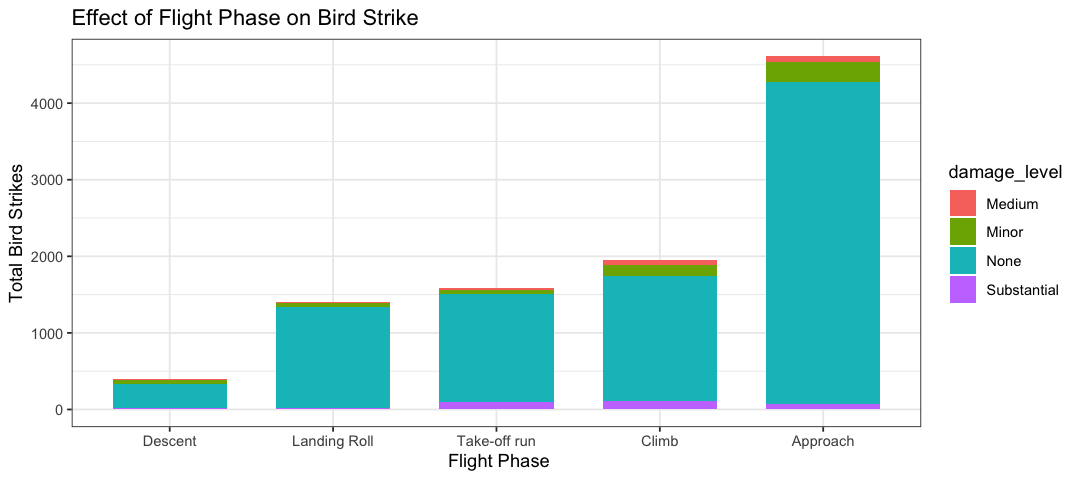

In [4]:
# Column Chart Plot 
options(repr.plot.width = 9, repr.plot.height = 4)

df_grouped <- df%>% group_by(flight_phase, damage_level)%>%
      summarize(count = n())

df_grouped$flight_phase <- factor(df_grouped$flight_phase,levels = c('Descent', 'Landing Roll', 'Take-off run', 'Climb', 'Approach'))

p <- ggplot(df_grouped, aes(x = flight_phase, y = count))+
      geom_col(aes(fill = damage_level), width = 0.7) +
      #geom_text(aes(y = count, label = count, group =damage_level), color = "white")+ # Fill column with count 
      labs(y = "Total Bird Strikes",
                 x = " Flight Phase",
                 title = "Effect of Flight Phase on Bird Strike") +
     theme_bw() 
p

## Stacked Area Chart

In [37]:
df_grouped2 <- df%>% group_by(year, damage_level)%>%
      summarize(count = n())
    
head(df_grouped2)

year,damage_level,count
<dbl>,<chr>,<int>
1990,Medium,12
1990,Minor,21
1990,None,413
1990,Substantial,14
1991,Medium,5
1991,Minor,27


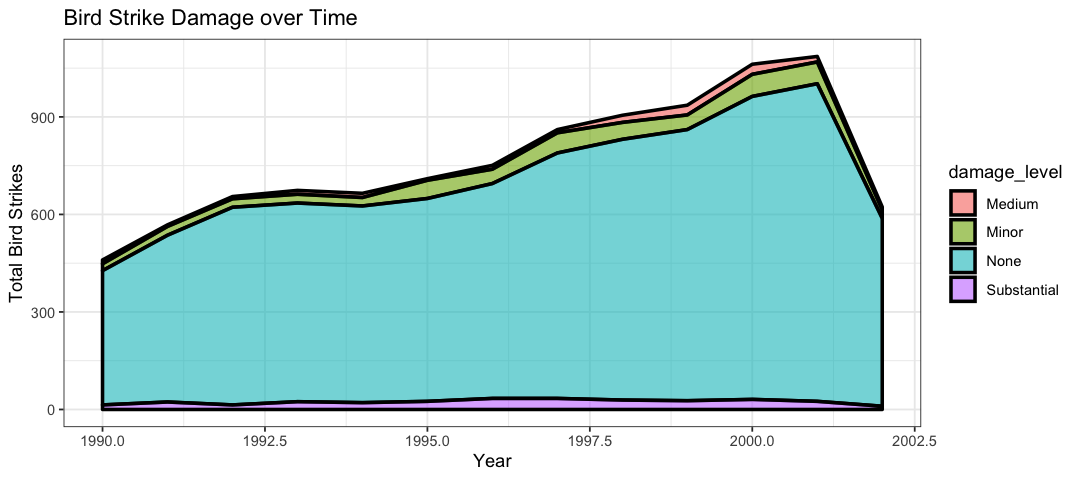

In [7]:
# Stacked Area Plot

options(repr.plot.width = 9, repr.plot.height = 4)

data <- df%>% group_by(year, damage_level)%>%
      summarize(count = n())

# Plot
ggplot(data, aes(x=year, y=count, fill=damage_level)) + 
    geom_area(alpha=0.6 , size=1, colour="black") +
    labs(y = "Total Bird Strikes",
         x = "Year",
         title = "Bird Strike Damage over Time") +
         theme_bw() 
